## **JSON file fraud detection challenge**
12th February 2024

This notebook documents the process of completing this fraud detection challenge. When starting this project, only one JSON file (`customers.json`) is provided. The objective is to create a model that will predict whether additional customers are fraudulent or not based off the same characteristics.

# Inspecting and Extracting the Data

**Initial 'eyeball' of the JSON file**

An initial look at the data is necesarry before any processing to get an idea of how the data is written. The data is a JSON file, containing a number of separate lines. Each new line is a JSON representing a different customer. For each new line, JSON data has 5 keys, 'customer', 'orders', 'paymentMethods', 'transactions' and 'fraudulent'.

- 'customer' contains information about the customer: "customerEmail", "customerPhone", "customerDevice", "customerIPAddress" and "customerBillingAddress".

- 'orders' contains a list of JSON objects, each of which represents a seperate order from that particular customer. These objects contain the keys "orderId", "orderAmount", "orderState" and "orderShippingAddress".

- 'paymentMethods' contains a list of JSON objects, each of which represents a separate payment method used by that particular customer. These objects contain the keys "paymentMethodId", "paymentMethodRegistrationFailure", "paymentMethodType", "paymentMethodProvider" and "paymentMethodIssuer"

- 'transactions' contains a list of JSON objects, each of which represents a seperate transaction from that particular customer. These objects contain the keys "transactionId", "orderId", "paymentMethodId", "transactionAmount" and "transactionFailed"

- 'fraudulent' is a single key-value pair specifying whether or not that particular customer is fraudulent.

**Best way to extract**

The best way to process this kind of data is to set up separate tables containing all orders, all payment methods, all transactions and all customers, and link them to each other with a unique customer key. Then, different data for each customer can easily be transformed from these separate dataframes to create a feature vector dataframe.

All customers have an email, so that'll be used as the unique customer key.

**Writing function to process the data into the appropriate dataframes.**

The following code loops over each line (i.e. each customer) in the initial JSON file. For each line/customer, it will:

- Loop over all the data in 'orders', 'paymentMethods' and 'transactions' for each line, and append these to separate lists (along with the customer email for that customer from the 'customer' section, to be used as a unique key). For each new line/customer, this data will be appended to the same lists to create dataframes containing orders, payment methods and transactions for all customers.

- Append the data in 'customer' and 'fraudulent' to a list. This can be used to make a pandas dataframe containing the information for each customer (including the email which is the unique key shared with the 'orders', 'paymentMethods' and 'transactions' dataframes), and a column specifying whether that customer is fraudulent or not.

In [ ]:
def process_json_data(json_data):

    #initialising empty lists
    orders_list = []
    payment_methods_list = []
    transactions_list = []
    customers_list = []

    for data in json_data:
        customer_key = data['customer']['customerEmail']  #customer email = unique key
        #orders
        for order in data.get('orders', []):
            order['customerEmail'] = customer_key
            orders_list.append(order)
        #payment methods
        for payment_method in data.get('paymentMethods', []):
            payment_method['customerEmail'] = customer_key
            payment_methods_list.append(payment_method)
        #transactions
        for transaction in data.get('transactions', []):
            transaction['customerEmail'] = customer_key
            transactions_list.append(transaction)
        #customers
        customer = data['customer']
        customer['fraudulent'] = data['fraudulent']
        customers_list.append(customer)

    #putting everything into dataframes
    df_orders = pd.DataFrame(orders_list)
    df_payment_methods = pd.DataFrame(payment_methods_list)
    df_transactions = pd.DataFrame(transactions_list)
    df_customers = pd.DataFrame(customers_list)

    return df_orders, df_payment_methods, df_transactions, df_customers

Now loading in the data file and applying the above function. As the above function will go through the JSON file line by line, it is necessary to **1)** open the file in read mode, read each line into a list **2)** strip away any whitespace and newline characters from each line and filter out any empty lines **3)** parse each line of the file from JSON format into a Python dictionary using json.loads and store these dictionaries in a list

In [ ]:
import pandas as pd
import json

#opening JSON file in read mode and reading lines
with open('customers.json', 'r') as f:
    data = f.readlines()

data = [line.strip() for line in data if line.strip()] #stripping newlines and spaces, and filter out empty lines
json_objects = [json.loads(line) for line in data] #parses each JSON object in the file
df_orders, df_payment_methods, df_transactions, df_customers = process_json_data(json_objects)

Now that the data has been loaded into pandas dataframes, they can be displayed to better get an understanding of the data

In [ ]:
df_orders

,orderId,orderAmount,orderState,orderShippingAddress,customerEmail
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",josephhoward@yahoo.com
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",josephhoward@yahoo.com
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",evansjeffery@yahoo.com
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,evansjeffery@yahoo.com
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",evansjeffery@yahoo.com
...,...,...,...,...,...
473,ow1cih,23,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",dawn05@tucker-brown.com
474,ak5a9n,32,fulfilled,"750 Sarah Stream\nAndersonfurt, WI 68970",dawn05@tucker-brown.com
475,1bubxa,25,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",dawn05@tucker-brown.com
476,p0gdbf,19,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",dawn05@tucker-brown.com


In [ ]:
df_payment_methods

,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,customerEmail
0,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,josephhoward@yahoo.com
1,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,evansjeffery@yahoo.com
2,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp,evansjeffery@yahoo.com
3,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,evansjeffery@yahoo.com
4,m52tx8e1s,False,card,Mastercard,Vertex Bancorp,evansjeffery@yahoo.com
...,...,...,...,...,...,...
337,1tmkeoxbm,False,card,American Express,Bulwark Trust Corp.,ethompson@jackson-sanders.com
338,f0xnu5om9,False,card,JCB 16 digit,His Majesty Bank Corp.,dawn05@tucker-brown.com
339,3zmkegkb8,False,paypal,JCB 15 digit,Bastion Banks,dawn05@tucker-brown.com
340,7yen1m1q8,False,card,VISA 13 digit,Vertex Bancorp,dawn05@tucker-brown.com


In [ ]:
df_transactions

,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed,customerEmail
0,a9lcj51r,vjbdvd,wt07xm68b,18,False,josephhoward@yahoo.com
1,y4wcv03i,yp6x27,wt07xm68b,26,False,josephhoward@yahoo.com
2,5mi94sfw,nlghpa,41ug157xz,45,False,evansjeffery@yahoo.com
3,br8ba1nu,uw0eeb,41ug157xz,23,False,evansjeffery@yahoo.com
4,a33145ss,bn44oh,y3xp697jx,43,True,evansjeffery@yahoo.com
...,...,...,...,...,...,...
618,7yilsi1o,1bubxa,7yen1m1q8,25,True,dawn05@tucker-brown.com
619,wmh52bns,1bubxa,3zmkegkb8,25,True,dawn05@tucker-brown.com
620,c82k5bcv,1bubxa,7yen1m1q8,25,False,dawn05@tucker-brown.com
621,xdw33hfp,p0gdbf,3zmkegkb8,19,False,dawn05@tucker-brown.com


In [ ]:
df_customers

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,fraudulent
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",True
...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",True
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",True
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",True
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",True


Just some quick checks to ensure that the data has been extracted effectively. A full EDA can be done after the data is combined into a single feature vector.

First, inspecting the shape of each dataframe:

In [ ]:
print(f"Shape of orders dataframe: {df_orders.shape}")
print(f"Shape of payment methods dataframe: {df_payment_methods.shape}")
print(f"Shape of transactions dataframe: {df_transactions.shape}")
print(f"Shape of customers dataframe: {df_customers.shape}")

Shape of orders dataframe: (478, 5)
Shape of payment methods dataframe: (342, 6)
Shape of transactions dataframe: (623, 6)
Shape of customers dataframe: (168, 6)


Now looking at each column of the dataframes to check datatypes and identify any missing/null values. The code below writes a function to make a new dataframe for summary statistics of each relevant dataframe. This function is applied to `df_customers`, `df_orders`, `df_payment_methods`, `df_transactions` and `df_fraudulent`, and the resulting dataframes are concatenated for easier reading:

In [ ]:
#function to create a summary DataFrame
def summary_df(df):
    summary = pd.DataFrame({
        'Column': df.columns,
        'DataType': df.dtypes.values,
        'MissingValues': df.isnull().sum().values
    })
    return summary

#creating summaries and concatenating
summary_orders = summary_df(df_orders)
summary_payment_methods = summary_df(df_payment_methods)
summary_transactions = summary_df(df_transactions)
summary_customers = summary_df(df_customers)

summaries = pd.concat([
    summary_orders.assign(DataFrame='Orders'),
    summary_payment_methods.assign(DataFrame='Payment_Methods'),
    summary_transactions.assign(DataFrame='Transactions'),
    summary_customers.assign(DataFrame='Customers')
], axis=0).reset_index(drop=True)

In [ ]:
summaries

,Column,DataType,MissingValues,DataFrame
0,orderId,object,0,Orders
1,orderAmount,int64,0,Orders
2,orderState,object,0,Orders
3,orderShippingAddress,object,0,Orders
4,customerEmail,object,0,Orders
5,paymentMethodId,object,0,Payment_Methods
6,paymentMethodRegistrationFailure,bool,0,Payment_Methods
7,paymentMethodType,object,0,Payment_Methods
8,paymentMethodProvider,object,0,Payment_Methods
9,paymentMethodIssuer,object,0,Payment_Methods


We appear to have all the columns that we're expecting and no missing values

# Creating dataframe of feature vectors

The assignment description states that a model should be built to detect fraud based off customer profiles. Hence, the input for such a model should be a dataframe where each row represents a specific customer, and each column contains a feature of that customer in a format that can be interpreted by a model (numerical datatypes). This dataframe should also include the `fraudulent`
column, which will be used as the target variable.

The `customers` dataframe can hence be used as the template. First, features already within this dataframe can be converted into a format appropriate for a model. Then, features of each customer from the other dataframes (df_orders, df_payment_methods, df_transactions and df_fraudulent) can be determined for each customer and added to the `customers` dataframe as new feature columns. Each row in the final dataframe will represent a customer 'profile'.

**Converting `df_customers` data into useable features**

The current features in the `df_customers` dataframe are not appropriate for training a model, however a number of useful features can be put together from the information available.

It might be the case that multiple 'users', corresponding to rows in the dataframe, share the same email. If this is the case, it could be a potentially interesting feature for predicting fraud.

Checking for the number of unique emails in `df_customers`:

In [ ]:
#getting duplicated customerEmails
duplicate_emails = df_customers[df_customers['customerEmail'].duplicated(keep=False)]
#sorting df to see duplicates together
duplicate_emails = duplicate_emails.sort_values(by='customerEmail')

In [ ]:
duplicate_emails

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,fraudulent
7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",True
40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",True
45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",True
65,johnlowery@gmail.com,04712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",True
79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",True
133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",True
155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",True
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",True


One email is shared across 8 different accounts. All of these accounts are fraudulent, so whether or not an email address is shared with other accounts could be a useful feature for predicting fraud.

Hence, a column can be added to `df_customers` specifying the number of accounts that customer's email is shared with:

In [ ]:
#group by customerEmail and using transform to assign the count to a new column
df_customers['EmailCount'] = df_customers.groupby('customerEmail')['customerEmail'].transform('count')

Since there's only one, model likely won't be accurate/have enough data, but it can be assessed as a feature during the EDA/model evaluation stage and is always worth including.

Similarly, checking for users who share the same billing address:

In [ ]:
#same as before
duplicate_billing_add = df_customers[df_customers['customerBillingAddress'].duplicated(keep=False)]
duplicate_billing_add = duplicate_billing_add.sort_values(by='customerBillingAddress')

In [ ]:
duplicate_billing_add

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,fraudulent,EmailCount
57,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1
80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1
90,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1


Again, all the customers who share a billing address with another user are fraudulent. This should certainly be considered as a feature when predicting fraud. Adding a column to the `df_customers` dataframe that gives a boolean 'True' or 'False' if a customer has a shared billing address:

In [ ]:
#getting value counts, those that appear more than once will have value_counts > 1
duplicate_addresses = df_customers['customerBillingAddress'].value_counts()
duplicate_addresses = duplicate_addresses[duplicate_addresses > 1].index

#create a boolean column - 'isin' means will be true if in above df (ie appears more than once)
df_customers['IsBillingAddressShared'] = df_customers['customerBillingAddress'].isin(duplicate_addresses)

As a sanity check, testing whether the number in the new column is equal to the number from `duplicate_billing_add` above:

In [ ]:
df_customers['IsBillingAddressShared'].value_counts()

False    165
True       3
Name: IsBillingAddressShared, dtype: int64

Again, because there are so few customers who share a billing address, this feature may not have a significant impact on any model, but it can be included in the EDA to find out.

A similar process can be used to check for duplicate customer phones, devices and IPAddresses:

In [ ]:
#same as before
duplicate_phone = df_customers[df_customers['customerPhone'].duplicated(keep=False)]
duplicate_phone = duplicate_billing_add.sort_values(by='customerPhone')
duplicate_phone

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,fraudulent,EmailCount
57,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1
90,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1
80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1


In [ ]:
duplicate_device = df_customers[df_customers['customerDevice'].duplicated(keep=False)]
duplicate_device = duplicate_billing_add.sort_values(by='customerDevice')
duplicate_device

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,fraudulent,EmailCount
80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1
90,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1
57,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1


In [ ]:
duplicate_IP = df_customers[df_customers['customerIPAddress'].duplicated(keep=False)]
duplicate_IP = duplicate_billing_add.sort_values(by='customerIPAddress')
duplicate_IP

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,fraudulent,EmailCount
57,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1
90,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1
80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,True,1


There are no duplicates, so no features will be created using this data.

Since all the possible features from `df_customers` have been converted into a format that can be used as input into a model, the remaining redundant columns can be dropped.

Customer email will be kept for now as it is the relational key between databases and will be needed when including features from `df_orders`, `df_payment_methods`, `df_transactions` and `df_fraudulent`.

In [ ]:
#dropping cols
df_customers = df_customers.drop(columns=['customerPhone', 'customerDevice', 'customerIPAddress','customerBillingAddress'])

In [ ]:
df_customers

,customerEmail,fraudulent,EmailCount,IsBillingAddressShared
0,josephhoward@yahoo.com,False,1,False
1,evansjeffery@yahoo.com,True,1,False
2,andersonwilliam@yahoo.com,False,1,False
3,rubenjuarez@yahoo.com,False,1,False
4,uchen@malone.com,True,1,False
...,...,...,...,...
163,mitchellvickie@brewer-jones.com,True,1,False
164,sbrown@hughes.biz,True,1,False
165,johnlowery@gmail.com,True,8,False
166,ethompson@jackson-sanders.com,True,1,False


**Extracting useable features from `df_orders` dataframe**

In [ ]:
print(df_orders['orderState'].value_counts())

fulfilled    400
failed        50
pending       28
Name: orderState, dtype: int64


There are a number of features that can be obtained about each user using `df_orders`. These can then be added to the 'profile' rows in `df_customers`.

For example, the total number of orders for each email address can be obtained from `df_orders` using pandas `.groupby()`. These values can then be added for each user as a new row in `df_customers`:

In [ ]:
#calculating total number of orders for each customer and giving new column name
order_counts = df_orders.groupby('customerEmail').size().reset_index(name='TotalOrders')
#merging above count with df_customers dataframe (left join returns all the rows from the 'left' df along with the matched
#rows from the 'right' df, so will contain counts as new column for each user) with name from before
df_customers = df_customers.merge(order_counts, on='customerEmail', how='left')
#replace nan with 0
df_customers['TotalOrders'].fillna(0, inplace=True)

Visualising this additional row in the df_customers dataframe:

In [ ]:
df_customers

,customerEmail,fraudulent,EmailCount,IsBillingAddressShared,TotalOrders
0,josephhoward@yahoo.com,False,1,False,2.0
1,evansjeffery@yahoo.com,True,1,False,3.0
2,andersonwilliam@yahoo.com,False,1,False,3.0
3,rubenjuarez@yahoo.com,False,1,False,3.0
4,uchen@malone.com,True,1,False,7.0
...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,True,1,False,3.0
164,sbrown@hughes.biz,True,1,False,5.0
165,johnlowery@gmail.com,True,8,False,23.0
166,ethompson@jackson-sanders.com,True,1,False,6.0


`.groupby()` can be used in a similar way to extract additional information from `df_orders`.

Finding the average order amount, total number of failed orders, ratio of failed orders to total orders and number of unique shipping addresses for each customer email address and including these features as new columns in `df_customers`:

In [ ]:
#ensuring customerEmail is the same type in both dfs to avoid confusion when using it as a key
df_transactions['customerEmail'] = df_orders['customerEmail'].astype(str)
df_customers['customerEmail'] = df_customers['customerEmail'].astype(str)

#calculating average order amount for each customer
average_order_amount = df_orders.groupby('customerEmail')['orderAmount'].mean().reset_index(name='AverageOrderAmount')
#merging like before
df_customers = df_customers.merge(average_order_amount, on='customerEmail', how='left')
df_customers['AverageOrderAmount'].fillna(0, inplace=True)

#total number of failed orders for each customer using same methods as before
failed_orders = df_orders[df_orders['orderState'] == 'failed'].groupby('customerEmail').size().reset_index(name='FailedOrders')
df_customers = df_customers.merge(failed_orders, on='customerEmail', how='left')
df_customers['FailedOrders'].fillna(0, inplace=True)
#calculating ratio of failed orders to total orders
df_customers['FailedOrderRatio'] = df_customers['FailedOrders'] / df_customers['TotalOrders']
#replace NaN values (from division by zero) with 0
df_customers['FailedOrderRatio'].fillna(0, inplace=True)

#counting unique order shipping addresses for each customer
unique_shipping_addresses = df_orders.groupby('customerEmail')['orderShippingAddress'].nunique().reset_index(name='UniqueShippingAddresses')
df_customers = df_customers.merge(unique_shipping_addresses, on='customerEmail', how='left')
df_customers['UniqueShippingAddresses'].fillna(0, inplace=True)

Again, visualising the added features to `df_customers`:

In [ ]:
df_customers

,customerEmail,fraudulent,EmailCount,IsBillingAddressShared,TotalOrders,AverageOrderAmount,FailedOrders,FailedOrderRatio,UniqueShippingAddresses
0,josephhoward@yahoo.com,False,1,False,2.0,22.000000,0.0,0.000000,1.0
1,evansjeffery@yahoo.com,True,1,False,3.0,37.000000,0.0,0.000000,3.0
2,andersonwilliam@yahoo.com,False,1,False,3.0,27.333333,1.0,0.333333,2.0
3,rubenjuarez@yahoo.com,False,1,False,3.0,28.333333,0.0,0.000000,2.0
4,uchen@malone.com,True,1,False,7.0,58.714286,1.0,0.142857,2.0
...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,True,1,False,3.0,42.000000,1.0,0.333333,2.0
164,sbrown@hughes.biz,True,1,False,5.0,27.000000,0.0,0.000000,2.0
165,johnlowery@gmail.com,True,8,False,23.0,37.956522,2.0,0.086957,13.0
166,ethompson@jackson-sanders.com,True,1,False,6.0,47.833333,1.0,0.166667,4.0


**Extracting useable features from `df_payment_methods` dataframe**

Similar methods can be used to gather similar features from `df_payment_methods`.

First, checking what different payment method types exist:

In [ ]:
print(df_payment_methods['paymentMethodType'].value_counts())

card         242
apple pay     36
paypal        36
bitcoin       28
Name: paymentMethodType, dtype: int64


The payment method used could potentially be a useful feature in predicting fraud. Hence, separate boolean columns will be added to `df_customers` specifying whether or not a certain payment type is used:

In [ ]:
#similar code used to previous cells
df_payment_methods['customerEmail'] = df_payment_methods['customerEmail'].astype(str)

#making mask for each payment method type
card_mask = df_payment_methods['paymentMethodType'] == 'card'
apple_pay_mask = df_payment_methods['paymentMethodType'] == 'apple pay'
paypal_mask = df_payment_methods['paymentMethodType'] == 'paypal'
bitcoin_mask = df_payment_methods['paymentMethodType'] == 'bitcoin'

#grouping by customerEmail and checking if any are True for each payment type
card_present = df_payment_methods[card_mask].groupby('customerEmail')['paymentMethodType'].any()
apple_pay_present = df_payment_methods[apple_pay_mask].groupby('customerEmail')['paymentMethodType'].any()
paypal_present = df_payment_methods[paypal_mask].groupby('customerEmail')['paymentMethodType'].any()
bitcoin_present = df_payment_methods[bitcoin_mask].groupby('customerEmail')['paymentMethodType'].any()

#convert series to dfs
card_df = card_present.to_frame(name='HasCard')
apple_pay_df = apple_pay_present.to_frame(name='HasApplePay')
paypal_df = paypal_present.to_frame(name='HasPaypal')
bitcoin_df = bitcoin_present.to_frame(name='HasBitcoin')

#merging and filling nulls as before
df_customers = df_customers.merge(card_df, on='customerEmail', how='left')
df_customers = df_customers.merge(apple_pay_df, on='customerEmail', how='left')
df_customers = df_customers.merge(paypal_df, on='customerEmail', how='left')
df_customers = df_customers.merge(bitcoin_df, on='customerEmail', how='left')
df_customers['HasCard'].fillna(False, inplace=True)
df_customers['HasApplePay'].fillna(False, inplace=True)
df_customers['HasPaypal'].fillna(False, inplace=True)
df_customers['HasBitcoin'].fillna(False, inplace=True)

Additional features that could be useful are the number of unique payment method types, the number of unique payment IDs, the number of payment registration failures and the ratio of registration failures to number of unique payment methods for each individual customer/email address.

Below, these features are calculated and added to the df_customers dataframe:

In [ ]:
#count the unique payment method types for each customer, same code as before
unique_payment_types = df_payment_methods.groupby('customerEmail')['paymentMethodType'].nunique().reset_index(name='UniquePaymentMethodTypes')
df_customers = df_customers.merge(unique_payment_types, on='customerEmail', how='left')
df_customers['UniquePaymentMethodTypes'].fillna(0, inplace=True)

#unique payment method IDs for each customer, same code
unique_payment_methods = df_payment_methods.groupby('customerEmail')['paymentMethodId'].nunique().reset_index(name='NumberOfUniquePaymentMethods')
df_customers = df_customers.merge(unique_payment_methods, on='customerEmail', how='left')
df_customers['NumberOfUniquePaymentMethods'].fillna(0, inplace=True)

#filtering for payment registration failures and counting them for each customer
payment_failures = df_payment_methods[df_payment_methods['paymentMethodRegistrationFailure'] == True].groupby('customerEmail').size().reset_index(name='PaymentRegistrationFailures')
#merging etc and finding ratio same as before
df_customers = df_customers.merge(payment_failures, on='customerEmail', how='left')
df_customers['PaymentRegistrationFailures'].fillna(0, inplace=True)
df_customers['FailureRatio'] = df_customers['PaymentRegistrationFailures'] / df_customers['NumberOfUniquePaymentMethods']
df_customers['FailureRatio'].fillna(0, inplace=True)

Now visualising what the features dataframe looks like with the additions from `df_payment_methods`:

In [ ]:
df_customers

,customerEmail,fraudulent,EmailCount,IsBillingAddressShared,TotalOrders,AverageOrderAmount,FailedOrders,FailedOrderRatio,UniqueShippingAddresses,HasCard,HasApplePay,HasPaypal,HasBitcoin,UniquePaymentMethodTypes,NumberOfUniquePaymentMethods,PaymentRegistrationFailures,FailureRatio
0,josephhoward@yahoo.com,False,1,False,2.0,22.000000,0.0,0.000000,1.0,True,False,False,False,1.0,1.0,1.0,1.000000
1,evansjeffery@yahoo.com,True,1,False,3.0,37.000000,0.0,0.000000,3.0,True,False,False,True,2.0,7.0,1.0,0.142857
2,andersonwilliam@yahoo.com,False,1,False,3.0,27.333333,1.0,0.333333,2.0,True,False,False,False,1.0,2.0,0.0,0.000000
3,rubenjuarez@yahoo.com,False,1,False,3.0,28.333333,0.0,0.000000,2.0,True,False,False,False,1.0,1.0,0.0,0.000000
4,uchen@malone.com,True,1,False,7.0,58.714286,1.0,0.142857,2.0,True,True,False,False,2.0,6.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,True,1,False,3.0,42.000000,1.0,0.333333,2.0,True,False,False,False,1.0,1.0,0.0,0.000000
164,sbrown@hughes.biz,True,1,False,5.0,27.000000,0.0,0.000000,2.0,True,False,False,False,1.0,3.0,0.0,0.000000
165,johnlowery@gmail.com,True,8,False,23.0,37.956522,2.0,0.086957,13.0,True,True,True,True,4.0,11.0,0.0,0.000000
166,ethompson@jackson-sanders.com,True,1,False,6.0,47.833333,1.0,0.166667,4.0,True,True,False,True,3.0,6.0,0.0,0.000000


**Adding df_transactions features**

Finally, features from `df_transactions` can be added in a similar way. The total number of transactions, average transaction amount, number of failed transactions and fraction of failed transactions compared to total transactions for each user are added to `df_customers` below:

In [ ]:
#using same code as before to count transactions, calculate averages and totals for each email adress
df_transactions['customerEmail'] = df_transactions['customerEmail'].astype(str)

transaction_counts = df_transactions.groupby('customerEmail').size().reset_index(name='NumberOfTransactions')
average_transaction_amount = df_transactions.groupby('customerEmail')['transactionAmount'].mean().reset_index(name='AverageTransactionAmount')
failed_transaction_counts = df_transactions[df_transactions['transactionFailed'] == True].groupby('customerEmail').size().reset_index(name='NumberOfFailedTransactions')

#merging and filling nans
df_customers = df_customers.merge(transaction_counts, on='customerEmail', how='left')
df_customers = df_customers.merge(average_transaction_amount, on='customerEmail', how='left')
df_customers = df_customers.merge(failed_transaction_counts, on='customerEmail', how='left')
df_customers['NumberOfTransactions'].fillna(0, inplace=True)
df_customers['AverageTransactionAmount'].fillna(0, inplace=True)
df_customers['NumberOfFailedTransactions'].fillna(0, inplace=True)

#calculating ratio same as before
df_customers['FailedTransactionFraction'] = df_customers['NumberOfFailedTransactions'] / df_customers['NumberOfTransactions']
df_customers['FailedTransactionFraction'].fillna(0, inplace=True)

Finally, the boolen 'True' or 'False' columns should be converted into integer '1' and '0' values (with 1 indicating True and 0 indicating False), so that they can be evaluated easily during EDA and interpreted by a model. The `customerEmail` column can also be dropped as it is an object datatype and is no longer necessary:

In [ ]:
#converting boolean columns to integers
bool_columns = ['IsBillingAddressShared', 'HasCard', 'HasApplePay', 'HasPaypal', 'HasBitcoin', 'fraudulent']
for col in bool_columns:
    df_customers[col] = df_customers[col].astype(int)

#dropping email column
df_customers = df_customers.drop('customerEmail', axis=1)

Now displaying the **final feature vector dataframe**:

In [ ]:
df_customers

,fraudulent,EmailCount,IsBillingAddressShared,TotalOrders,AverageOrderAmount,FailedOrders,FailedOrderRatio,UniqueShippingAddresses,HasCard,HasApplePay,HasPaypal,HasBitcoin,UniquePaymentMethodTypes,NumberOfUniquePaymentMethods,PaymentRegistrationFailures,FailureRatio,NumberOfTransactions,AverageTransactionAmount,NumberOfFailedTransactions,FailedTransactionFraction
0,0,1,0,2.0,22.000000,0.0,0.000000,1.0,1,0,0,0,1.0,1.0,1.0,1.000000,2.0,22.000000,0.0,0.000000
1,1,1,0,3.0,37.000000,0.0,0.000000,3.0,1,0,0,1,2.0,7.0,1.0,0.142857,3.0,37.000000,1.0,0.333333
2,0,1,0,3.0,27.333333,1.0,0.333333,2.0,1,0,0,0,1.0,2.0,0.0,0.000000,3.0,27.000000,1.0,0.333333
3,0,1,0,3.0,28.333333,0.0,0.000000,2.0,1,0,0,0,1.0,1.0,0.0,0.000000,3.0,28.000000,1.0,0.333333
4,1,1,0,7.0,58.714286,1.0,0.142857,2.0,1,1,0,0,2.0,6.0,0.0,0.000000,7.0,53.000000,2.0,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1,1,0,3.0,42.000000,1.0,0.333333,2.0,1,0,0,0,1.0,1.0,0.0,0.000000,3.0,36.666667,0.0,0.000000
164,1,1,0,5.0,27.000000,0.0,0.000000,2.0,1,0,0,0,1.0,3.0,0.0,0.000000,5.0,38.000000,2.0,0.400000
165,1,8,0,23.0,37.956522,2.0,0.086957,13.0,1,1,1,1,4.0,11.0,0.0,0.000000,23.0,41.869565,4.0,0.173913
166,1,1,0,6.0,47.833333,1.0,0.166667,4.0,1,1,0,1,3.0,6.0,0.0,0.000000,6.0,24.500000,3.0,0.500000


# Exploratory Data Analysis

Now that all relevant features have been combined into a single feature vector dataframe, the importance of each feature in predicting fraud can be evaluated, along with the general trends in the data.

Matplotlib and seaborn packages can be used to create visualisations:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

First, each column in the feature vector dataframe can be checked for missing/null values:

In [ ]:
missing_values = df_customers.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 fraudulent                      0
EmailCount                      0
IsBillingAddressShared          0
TotalOrders                     0
AverageOrderAmount              0
FailedOrders                    0
FailedOrderRatio                0
UniqueShippingAddresses         0
HasCard                         0
HasApplePay                     0
HasPaypal                       0
HasBitcoin                      0
UniquePaymentMethodTypes        0
NumberOfUniquePaymentMethods    0
PaymentRegistrationFailures     0
FailureRatio                    0
NumberOfTransactions            0
AverageTransactionAmount        0
NumberOfFailedTransactions      0
FailedTransactionFraction       0
dtype: int64


The lack of nulls is expected given the null check after initially extracting the data, however it gives a good sanity check to ensure no problems with the previous stages.

Next checking the datatypes for each feature:

In [ ]:
data_types = df_customers.dtypes
print("\nData Types:\n", data_types)


Data Types:
 fraudulent                        int64
EmailCount                        int64
IsBillingAddressShared            int64
TotalOrders                     float64
AverageOrderAmount              float64
FailedOrders                    float64
FailedOrderRatio                float64
UniqueShippingAddresses         float64
HasCard                           int64
HasApplePay                       int64
HasPaypal                         int64
HasBitcoin                        int64
UniquePaymentMethodTypes        float64
NumberOfUniquePaymentMethods    float64
PaymentRegistrationFailures     float64
FailureRatio                    float64
NumberOfTransactions            float64
AverageTransactionAmount        float64
NumberOfFailedTransactions      float64
FailedTransactionFraction       float64
dtype: object


Each of these datatypes is suitable/interpretable for a model.

Printing out summary statistics of each column using pandas `.describe()` feature:

In [ ]:
df_customers.describe()

,fraudulent,EmailCount,IsBillingAddressShared,TotalOrders,AverageOrderAmount,FailedOrders,FailedOrderRatio,UniqueShippingAddresses,HasCard,HasApplePay,HasPaypal,HasBitcoin,UniquePaymentMethodTypes,NumberOfUniquePaymentMethods,PaymentRegistrationFailures,FailureRatio,NumberOfTransactions,AverageTransactionAmount,NumberOfFailedTransactions,FailedTransactionFraction
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.363095,1.333333,0.017857,3.803571,29.739086,0.380952,0.076519,2.172619,0.785714,0.202381,0.238095,0.190476,1.416667,2.494048,0.238095,0.110510,3.803571,30.674344,0.928571,0.216381
std,0.482330,1.495169,0.132828,4.718747,29.497376,0.654871,0.138897,2.713896,0.411553,0.402976,0.427191,0.393851,0.885118,2.836877,0.560561,0.263458,4.718747,18.109004,1.135024,0.258300
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,21.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,20.812500,0.000000,0.000000
50%,0.000000,1.000000,0.000000,3.000000,29.375000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.500000,0.000000,0.000000,3.000000,32.000000,1.000000,0.173913
75%,1.000000,1.000000,0.000000,4.000000,37.956522,1.000000,0.086957,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,4.000000,41.562500,1.000000,0.333333
max,1.000000,8.000000,1.000000,23.000000,353.000000,3.000000,0.500000,13.000000,1.000000,1.000000,1.000000,1.000000,4.000000,15.000000,4.000000,1.000000,23.000000,90.200000,5.000000,1.000000


There don't appear to be any unusually high outliers, negative values or columns consisting entirely of 0s. At this current stage, it doesn't appear that the data requires further 'cleaning' in any way.

Now taking a look at the number of customers that are fraudulent vs. non-fraudulent. This will have an impact on the training of the model.

In [ ]:
print(df_customers['fraudulent'].value_counts())

0    107
1     61
Name: fraudulent, dtype: int64


There are significantly more non-fraudulent customers that fraudulent customers in the data. This may skew results when training a model. In general, there is not a large amount of data which may make training an effective model difficult (overfitting is likely to be an issue).

Now, finding the correlation between each feature and the fraudulent column. This will give a good idea of what factors are most important when predicting fraud.

The code below uses pandas `.corr()` to create a correlation matrix, and then selects the column in the matrix for `fraudulent`. The self-correlation is dropped, and the remaining values are sorted, with the highest correlating variables at the top:

In [ ]:
correlation_matrix = df_customers.corr() #computes the correlation matrix
#getting correlation with the 'fraudulent' column and dropping the self-correlation of 'fraudulent'
fraud_correlation = correlation_matrix['fraudulent'].drop('fraudulent')
#sorting the correlations by absolute value in descending order
sorted_correlation = fraud_correlation.abs().sort_values(ascending=False)

print(sorted_correlation)

NumberOfUniquePaymentMethods    0.480785
UniquePaymentMethodTypes        0.457019
UniqueShippingAddresses         0.386412
NumberOfTransactions            0.368286
TotalOrders                     0.368286
HasBitcoin                      0.327224
HasApplePay                     0.297442
EmailCount                      0.296150
AverageOrderAmount              0.280886
NumberOfFailedTransactions      0.277354
FailedOrders                    0.260893
HasCard                         0.213315
IsBillingAddressShared          0.178585
HasPaypal                       0.159146
PaymentRegistrationFailures     0.143429
AverageTransactionAmount        0.079425
FailureRatio                    0.047533
FailedOrderRatio                0.040596
FailedTransactionFraction       0.017757
Name: fraudulent, dtype: float64


From this analysis, the number of unique payment methods and unique payment types used by a customer appear to be the most significant indicators of fraud. This is understandable, as fraudulent customers may be using stolen details, or be using different methods to avoid detection.

Now visualising the above results as a bar chart:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

#normalising features
scaler = StandardScaler()
df_customers_scaled = pd.DataFrame(scaler.fit_transform(df_customers), columns=df_customers.columns)

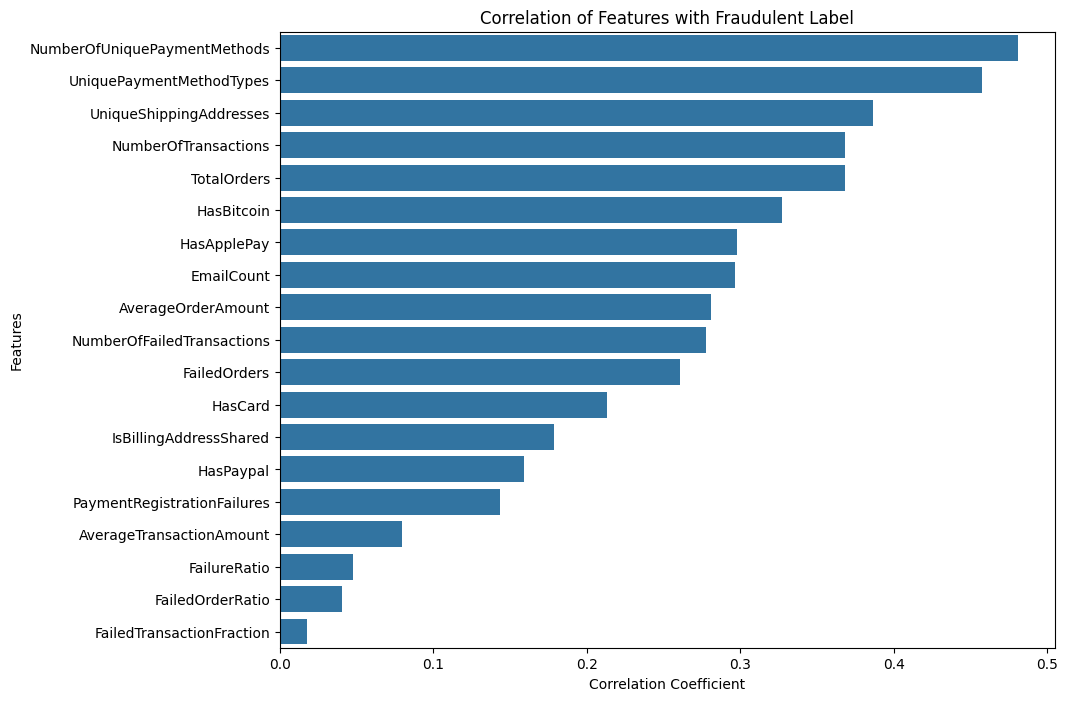

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_correlation.values, y=sorted_correlation.index)
plt.title('Correlation of Features with Fraudulent Label')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

plt.show()

The fractions/ratios or failed orders and registrations appear to have little correlation with customer fraud. It appears that using bitcoin is a greater indicator of fraud than any other payment type.

Despite this analysis, it is important to consider that correlation does not equal causation. Although fraudulent customers might typically have a high number of orders, this does not necesarrily mean that having a high number of orders will make a customer fraudulent. This is something to consider when training a model.

To get an idea of how the values of each feature are distributed for fraudulent vs. non-fraudulent customers, the mean summary statistics can be calculated as below:

In [ ]:
df_grouped_by_fraud = df_customers.groupby('fraudulent').mean()
df_grouped_by_fraud

,EmailCount,IsBillingAddressShared,TotalOrders,AverageOrderAmount,FailedOrders,FailedOrderRatio,UniqueShippingAddresses,HasCard,HasApplePay,HasPaypal,HasBitcoin,UniquePaymentMethodTypes,NumberOfUniquePaymentMethods,PaymentRegistrationFailures,FailureRatio,NumberOfTransactions,AverageTransactionAmount,NumberOfFailedTransactions,FailedTransactionFraction
fraudulent,,,,,,,,,,,,,,,,,,,
0,1.000000,0.00000,2.495327,23.501869,0.252336,0.072274,1.383178,0.719626,0.112150,0.186916,0.093458,1.11215,1.467290,0.177570,0.119938,2.495327,29.591589,0.691589,0.212928
1,1.918033,0.04918,6.098361,40.679778,0.606557,0.083965,3.557377,0.901639,0.360656,0.327869,0.360656,1.95082,4.295082,0.344262,0.093974,6.098361,32.573604,1.344262,0.222437


The distributions for non-boolean variables can be better understood by visualising with a box plot:

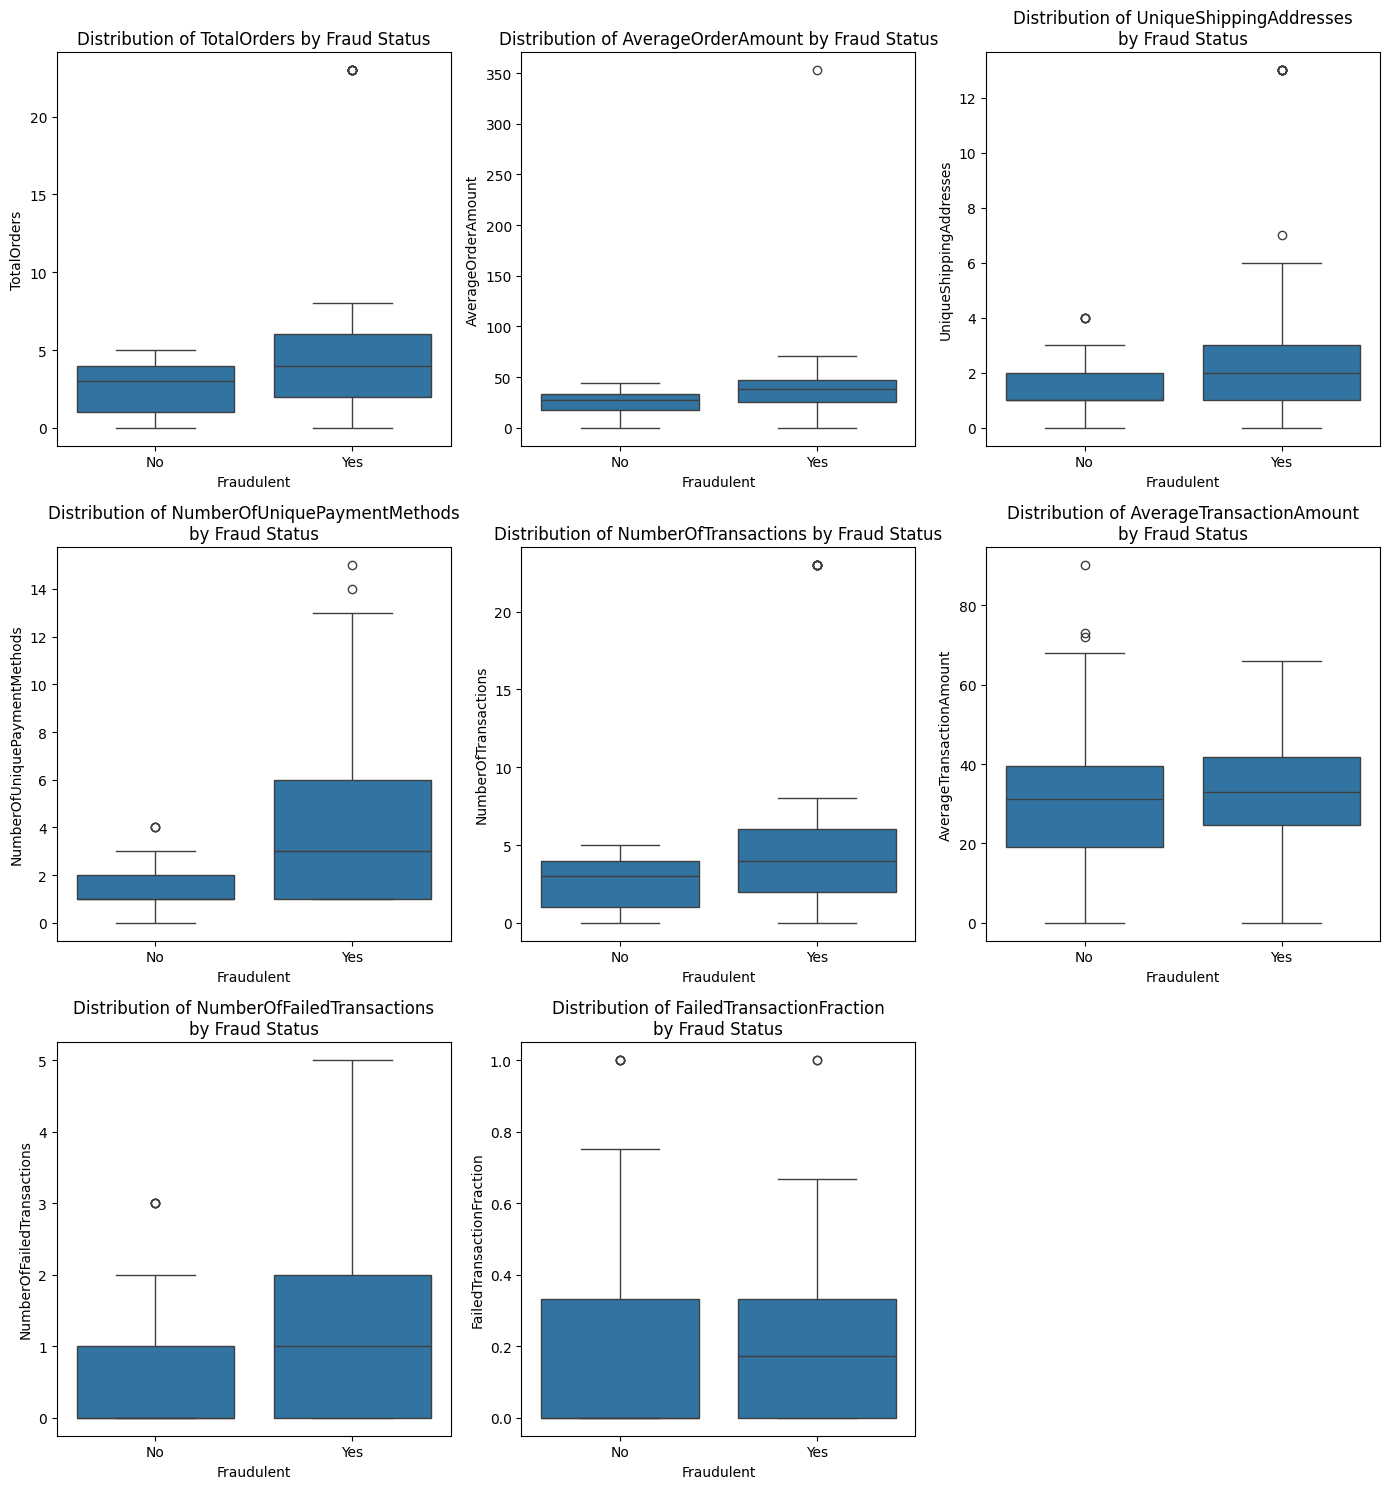

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#defining the non-boolean numerical features to plot
numerical_features = ['TotalOrders', 'AverageOrderAmount', 'UniqueShippingAddresses',
                      'NumberOfUniquePaymentMethods', 'NumberOfTransactions',
                      'AverageTransactionAmount', 'NumberOfFailedTransactions',
                      'FailedTransactionFraction']

#will make 3 subplots per row
num_rows = 3
fig_height = num_rows * 5
plt.figure(figsize=(14, fig_height))

#looping over the features and creating box plots
for index, feature in enumerate(numerical_features):
    ax = plt.subplot(num_rows, 3, index + 1)
    sns.boxplot(x='fraudulent', y=feature, data=df_customers)
    title = f'Distribution of {feature}\nby Fraud Status' if len(feature) > 20 else f'Distribution of {feature} by Fraud Status'
    plt.title(title)
    plt.xlabel('Fraudulent')
    plt.xticks([0, 1], ['No', 'Yes'])

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.tight_layout()
plt.show()

There are some outliers but nothing to suggest impurity in the data. Remove some features so as not to confuse the model too much.

Because of their poor correlation with fraudulent activity, the ratio/fraction features (`FailureRatio`, `FailedOrderRatio` and `FailedTransactionFraction`) that were calculated during the transformation of `df_customers` will be removed from the dataframe. This is because simpler input features may improve the models training and performace (there will be fewer variables impacting model training).

# Building fraud prediction model

In this context, each transaction (or customer account) must be classified into one of two categories: fraudulent or not fraudulent. A classifier model can be trained on this data to learn patterns that are indicative of fraud. Once trained, it can then predict whether new, unseen transactions are likely to be fraudulent. The data will be split into training and test sets, with the former used to train the model and the latter used to evaluate how the model performs on unseen data.

A random forest classifier is a good choice of model in this case for several reasons:

- The dataset is imbalanced (there are singificantly more non-fraudulent customers than fraudulent customers) and random forests handle this well because they involve building multiple decision trees, which can focus on different patterns in the data

- Random forests are good at providing insights into which features are most important in predicting fraud, helping to improve understanding of the model and the underlying fraudulent behavior

- They are less likely to overfit compared to some other models because they average out the biases by combining the results of multiple decision trees.

Scikit-learn will be used to train the model. The code below first applies normalisation to the features using scikit-learn's `StandardScaler`:

The `fraudulent` column is seperated from the rest of the data, to be used as the target variable (y), whilst the remaining feature data will be used as input (X).

The separated data is split into training and test sets for model validation on unseen data.

In [ ]:
X = df_customers_scaled.drop(columns=['fraudulent']).astype(float) #features
y = df_customers['fraudulent'].astype(int) #target

#splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now the classifier is initialised and fit using more scikit-learn methods

In [ ]:
#initialising and training classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

the unseen test input features can be passed through the model and the result can be compared with the test y values from the original dataset to evaluate the model's performace:

In [ ]:
#predicting on test inputs
y_pred = classifier.predict(X_test)

#initial model evaluation using sklearn classification report
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        18
           1       1.00      0.50      0.67        16

    accuracy                           0.76        34
   macro avg       0.85      0.75      0.74        34
weighted avg       0.84      0.76      0.75        34

Accuracy: 0.7647058823529411


An accuracy of 76% suggests the model has some ability to predict fraud. Further analysis of the model will be performed to evaluate its effectiveness

# Evaluating Model Success

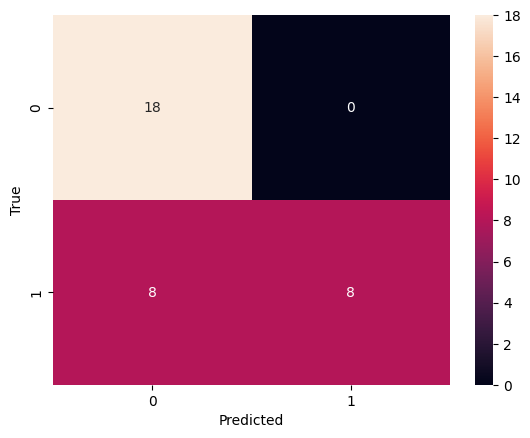

In [ ]:
from sklearn.metrics import confusion_matrix

#plotting confusion matrix using sklearn's 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In the confusion matrix, the x-axis represents the predicted labels by the model (what the model guessed), whilst the y-axis represents the true labels (the actual correct answers).

There are 18 true negatives (model predicted no fraud and was correct), 8 true positives (model predicted fraud and was correct), 0 false positives (model predicted fraud and was incorrect) and 8 false negatives (model predicted no fraid and was incorrect).

These results suggest the model is good at classifying a user that isn't fraudulent, but needs improving at classifying fraudulent users correctly. For a problem like this, false negatives can often be more dangerous than false positives, because a false negative means a fraudulent transaction has gone undetected. Hence, any future model development for similar problems could focus on reducing false negatives (one way of doing this could be to adjust the discrimination threshold of the classifier). The cost of incorrectly identifying someone as fraudulent when they're not might simply be an inconvinience to that user, whereas the cost of incorrectly identifying someone as not fraudulent when they are fraudulent could be a much more significant financial or data security risk.

To visualise which features have the greatest importance in the model, scikit-learn's inbuilt `feature_importances_` method can be called:

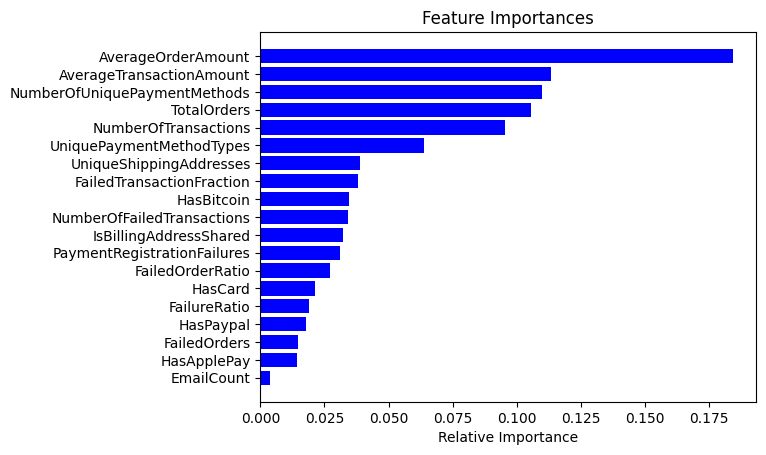

In [ ]:
import numpy as np

#calculating importances using sklearn's 'feature_importances_' and plotting bar chart
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From this analysis, the most important features are different than those highlighted in the EDA (i.e. high correlation coefficients with `fraudulent`). `NumberOfUniquePaymentMethods` still has high importance (as expected), but other features such as `AverageOrderAmount` and `AverageTransactionAmount` top the list.

These results could suggest that the model is not using the correct features to make a prediction. If such a high importance is placed on the order and transaction amounts then it may punish certain users who typically make larger purchases. Additional training, increased quantities of data and model adjustment may result in different feature model importances.

Because such a small amount of data is used, it is possible that overfitting is occuring. Training curves can be plotten using the inbuilt scikit-learn `learning_curve` function to check for this.

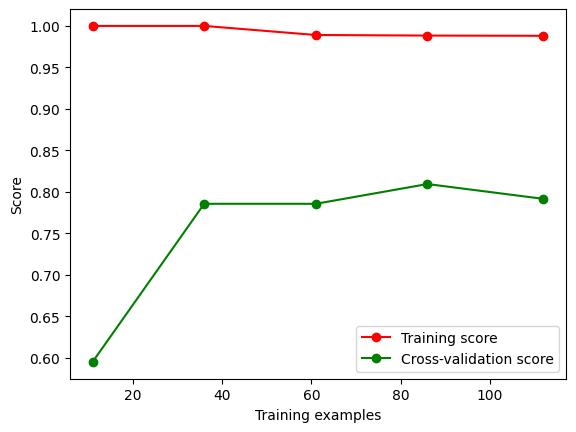

In [ ]:
from sklearn.model_selection import learning_curve

#applying sklearn 'learning_curve' and plotting results
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)) #separating into 5 training sets

#calculating mean train and test scores from cross val
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

The gap between the training score and the cross-validation score is quite significant and does not narrow much as the number of training examples increases. This could be an indicator of overfitting, where the model performs well on the training data but does not generalize as well to unseen data.

# Evaluation

The model achieved 76% accuracy on an unseen test set. Given the small quantity of data available, this is somewhat successful. However, the model was mainly good at determining if someone is definitely not a fraudster, which is less important than identifying all fraudsters correctly (i.e. the model had few false positives, but too many false negatives). This is not ideal for fraud detection, since the most important thing is that no fraudsters slip through the net. If more time could be spent on this task, the following could be considered:

- Place more focus on **reducing false negatives**. This could be done potentially by adjusting the discrimination threshold of the classifier
- Using **more data** to improve the models ability to generalise and prevent overfitting
- Adjusting the **hyperparameters** of the model more to optimise performance (possibly using am exhuastive grid-search)
- Other measures to **prevent overfitting** could be taken (such as cross validation and regularisation)
- Try **different types of model** (e.g. neural networks), and compare the performance of each model to select the most effective